## movie industry data analysis

In [11]:
import sys
!{sys.executable} -m pip install Seaborn

You should consider upgrading via the 'C:\Users\49163\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import figure
plt.rcParams["figure.figsize"] = (12,8)
plt.style.use('ggplot')

### data exploration

In [2]:
df= pd.read_csv(r'C:\Users\49163\Desktop\New folder\movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


### data cleaning

#### I - missing data

In [4]:
missing_value_count=df.isnull().sum()
missing_value_count[0:10]

name         0
rating      77
genre        0
year         0
released     2
score        3
votes        3
director     0
writer       3
star         1
dtype: int64

In [5]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [6]:
total_cells=np.product(df.shape)
total_missing=missing_value_count.sum()
percent_missing=(total_missing/total_cells)*100
print('this percent of data is missing:',percent_missing)

this percent of data is missing: 2.150060858981047


In [7]:
#droping rows with missing values
df2=df.dropna()
df2.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [8]:
#see what percentage of data is lost after droping
df2.size/df.size*100

70.6964006259781

#### II - duplication

In [9]:
# Looking for movie names with the same name though the data

duplicateDFRow = df[df.duplicated('name')]
print(duplicateDFRow)

                   name rating      genre  year  \
1360           The Bear     PG  Adventure  1988   
1836            Impulse      R      Crime  1990   
2022           Paradise  PG-13      Drama  1991   
2104      Forever Young     PG      Drama  1992   
2368        Dream Lover      R      Drama  1993   
...                 ...    ...        ...   ...   
7526            The Kid      R  Biography  2019   
7529       Child's Play      R      Drama  2019   
7536              Shaft      R     Action  2019   
7556  After the Wedding  PG-13      Drama  2019   
7623        The Captain    NaN     Action  2019   

                               released  score    votes             director  \
1360   October 27, 1989 (United States)    7.7  17000.0  Jean-Jacques Annaud   
1836      April 6, 1990 (United States)    5.7   1200.0         Sondra Locke   
2022    October 4, 1991 (United States)    6.7   2700.0  Mary Agnes Donoghue   
2104  December 16, 1992 (United States)    6.3  45000.0          St

In [10]:
# Removing all unwanted duplicates

df3 = df2.drop_duplicates('name')

In [11]:
# Viewing that all duplicates have been removed

duplicateDFRow = df3[df3.duplicated('name')]
print(duplicateDFRow)

Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime]
Index: []


### analysis 

#### I - Measure Viewing

In [12]:
# Getting an idea of the numerical values in our dataset

df3.describe(include = [np.number]).T #Including only numeric columns in a DataFrame description

,count,mean,std,min,25%,50%,75%,max
year,5336.0,2.001507e+03,1.052154e+01,1980.0,1993.00,2002.0,2010.0,2.020000e+03
score,5336.0,6.395184e+00,9.628007e-01,1.9,5.80,6.5,7.1,9.300000e+00
votes,5336.0,1.142297e+05,1.835383e+05,195.0,19000.00,52000.0,128000.0,2.400000e+06
budget,5336.0,3.564905e+07,4.124171e+07,6000.0,10000000.00,21000000.0,45000000.0,3.560000e+08
gross,5336.0,1.015924e+08,1.841672e+08,309.0,10622833.75,35927567.0,110353970.0,2.847246e+09
runtime,5336.0,1.080877e+02,1.811038e+01,63.0,95.00,105.0,118.0,2.710000e+02


In [13]:
# Some conclusions

# 1. The studied time lapse goes from 1980 to 2020.
# 2. The average film duration is 2 h 33 min.

In [14]:
df3.describe(include=[object]).T

,count,unique,top,freq
name,5336,5336,The Shining,1
rating,5336,10,R,2557
genre,5336,15,Comedy,1483
released,5336,2546,"August 26, 2016 (United States)",7
director,5336,2045,Woody Allen,33
writer,5336,3178,Woody Allen,32
star,5336,1830,Nicolas Cage,39
country,5336,50,United States,4251
company,5336,1464,Universal Pictures,328


In [15]:
# Some Conclusions

# 1. Highest counts for rating is R rated
# 2. Highest counts for genre is Comedy 
# 3. Woody Allen directed 33 movies 
# 4. Nicolas Cage made 39 movies
# 5. United states has made 4319 movies during the time 

#### II - correlation

In [16]:
df3.corr(method='pearson')#pearson,#kendall,#spearman
# budget and gross are highly correlated

,year,score,votes,budget,gross,runtime
year,1.000000,0.061236,0.207542,0.326118,0.271863,0.075414
score,0.061236,1.000000,0.473250,0.071325,0.222235,0.413459
votes,0.207542,0.473250,1.000000,0.438567,0.618162,0.348798
budget,0.326118,0.071325,0.438567,1.000000,0.737723,0.317912
gross,0.271863,0.222235,0.618162,0.737723,1.000000,0.276189
runtime,0.075414,0.413459,0.348798,0.317912,0.276189,1.000000


Text(87.0, 0.5, 'movie features')

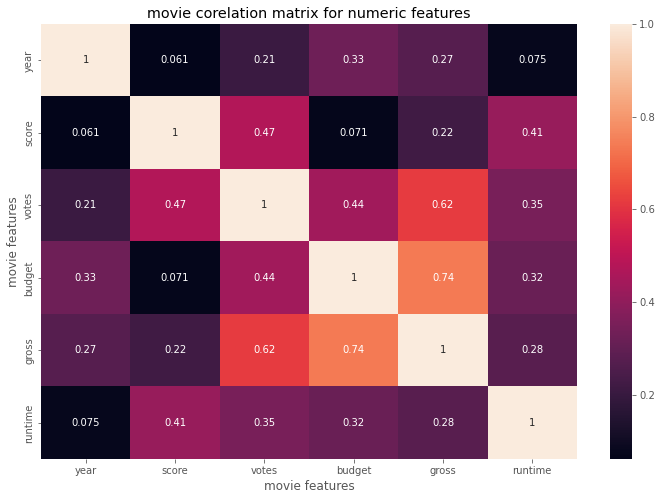

In [17]:
correlation_matrix = df3.corr(method='pearson')

sns.heatmap(correlation_matrix , annot = True)

plt.title('movie corelation matrix for numeric features')

plt.xlabel('movie features')

plt.ylabel('movie features')


In [18]:
df_numerized = df3.copy()
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype =='object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1297,8.4,927000.0,1779,2809,696,46,19000000.0,46998772.0,1416,146.0
1,3929,6,1,1980,1120,5.8,65000.0,1566,1147,214,47,4500000.0,58853106.0,449,104.0
2,3641,4,0,1980,1352,8.7,1200000.0,752,1800,1149,47,18000000.0,538375067.0,939,124.0
3,204,4,4,1980,1120,7.7,221000.0,884,1400,1465,47,3500000.0,83453539.0,1100,88.0
4,732,6,4,1980,1163,7.3,108000.0,715,347,271,47,6000000.0,39846344.0,1075,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,900,6.6,140000.0,16,2369,1797,47,90000000.0,426505244.0,449,124.0
7649,3556,4,0,2020,709,6.5,102000.0,847,2288,147,47,85000000.0,319715683.0,1100,99.0
7650,1153,4,1,2020,900,5.6,53000.0,1792,2804,1461,47,175000000.0,245487753.0,1387,101.0
7651,3978,4,1,2020,754,6.8,42000.0,294,2070,637,6,135000000.0,111105497.0,12,100.0


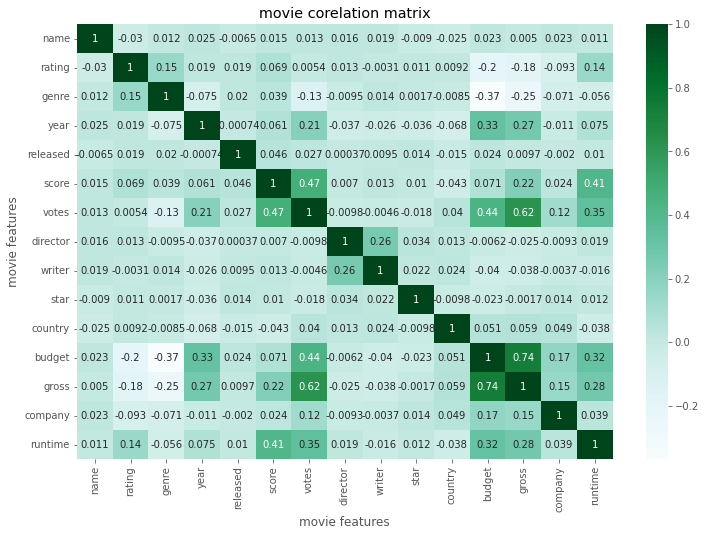

In [19]:
correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix , annot= True ,cmap="BuGn" )

plt.title('movie corelation matrix')

plt.xlabel('movie features')

plt.ylabel('movie features')

plt.show()

#### III - Data Visualization

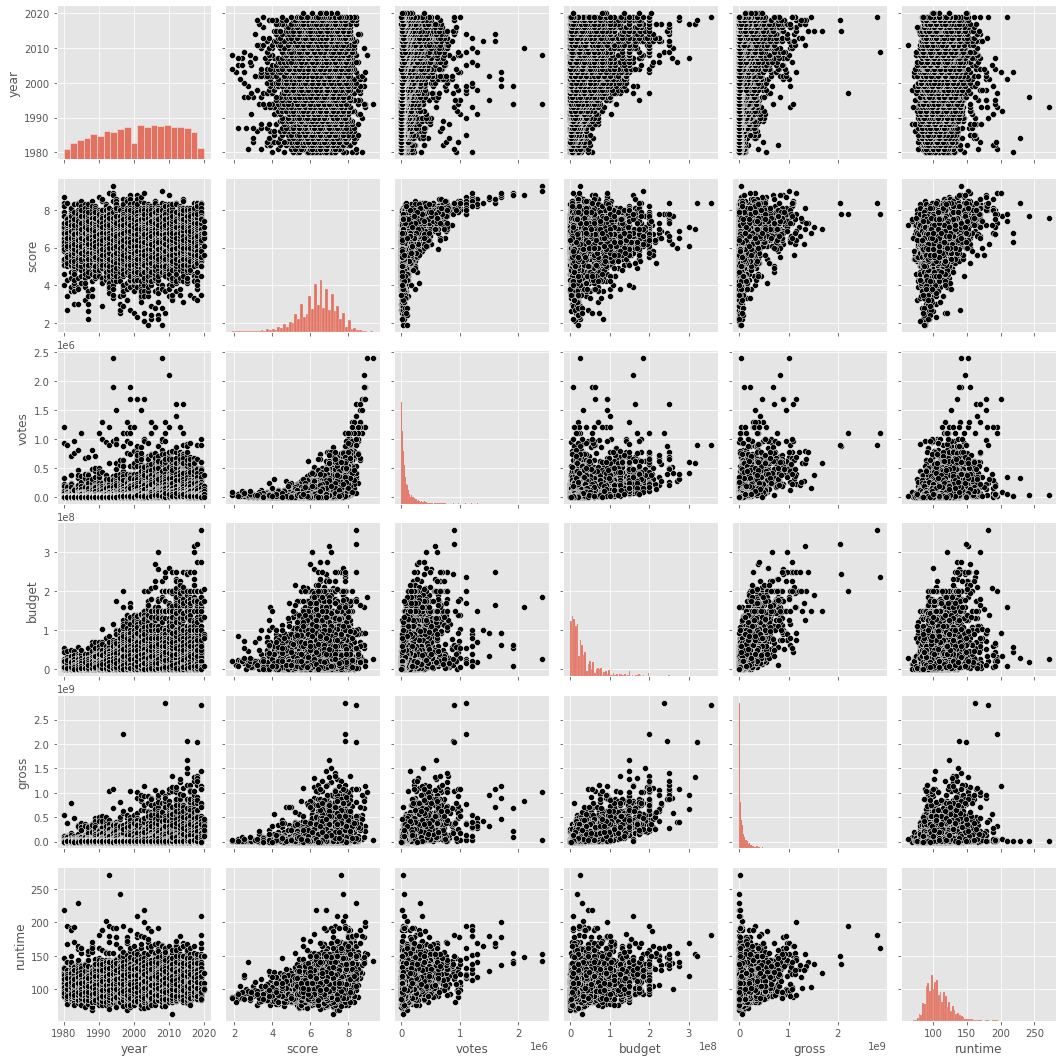

In [20]:
# An overview to all the vizualiztion between various attributes

sns.pairplot(df3,diag_kind ='hist',plot_kws={'color':'black'})

In [21]:
#now let's plot the ones that has closet correlation 

Text(0, 0.5, 'budget of film')

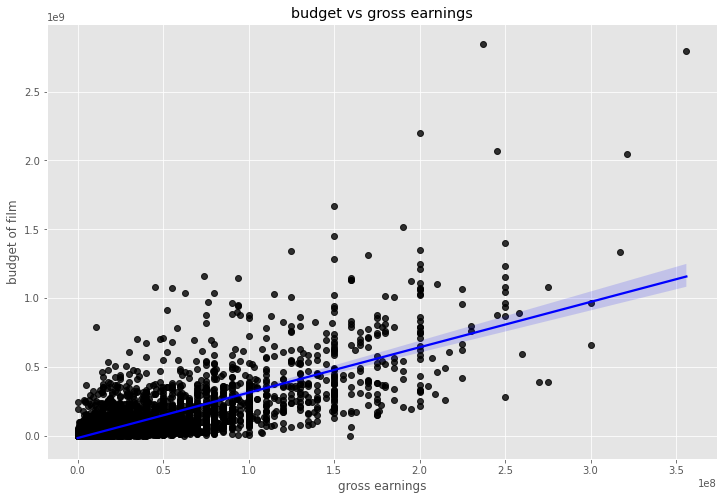

In [22]:
sns.regplot(x='budget',y='gross', data=df3 ,scatter_kws={'color':'black'},line_kws={'color':'blue'})

plt.title('budget vs gross earnings')

plt.xlabel('gross earnings')

plt.ylabel('budget of film')

Text(0, 0.5, 'votes')

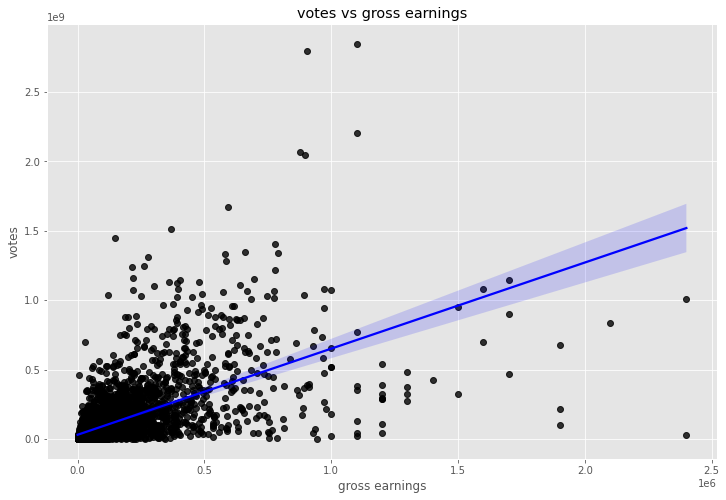

In [23]:
#scatter plot with votes vs gross

sns.regplot(x='votes',y='gross', data=df3 ,scatter_kws={'color':'black'},line_kws={'color':'blue'})

plt.title('votes vs gross earnings')

plt.xlabel('gross earnings')

plt.ylabel('votes')

- Comparing Top 10 Companies by Budget and Gross

In [24]:
# First we willmake a new dataframe for the company's budget and gross sum and sorting them

com = df3.groupby('company')['budget','gross'].sum().sort_values(by = 'gross', ascending = False)
com.head(10) 

# Second we will reset the index(adding number index) and take only the top 10 comapnies

top10c = com.reset_index()
top10c = top10c.head(10)
top10c

C:\Users\49163\AppData\Local\Temp/ipykernel_13592/3423174783.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  com = df3.groupby('company')['budget','gross'].sum().sort_values(by = 'gross', ascending = False)


,company,budget,gross
0,Warner Bros.,1.914930e+10,5.340279e+10
1,Universal Pictures,1.582413e+10,5.076294e+10
2,Columbia Pictures,1.501111e+10,4.087009e+10
3,Twentieth Century Fox,1.133960e+10,3.933383e+10
4,Paramount Pictures,1.332345e+10,3.899598e+10
5,Walt Disney Pictures,9.876700e+09,3.285952e+10
6,New Line Cinema,5.396200e+09,1.877407e+10
7,Marvel Studios,2.444000e+09,1.354678e+10
8,DreamWorks Animation,3.344000e+09,1.187361e+10
9,Dreamworks Pictures,3.702700e+09,1.092448e+10


([<matplotlib.axis.XTick at 0x262a6520100>,
 [Text(0, 0, 'Warner Bros.'),
  Text(1, 0, 'Universal Pictures'),
  Text(2, 0, 'Columbia Pictures'),
  Text(3, 0, 'Twentieth Century Fox'),
  Text(4, 0, 'Paramount Pictures'),
  Text(5, 0, 'Walt Disney Pictures'),
  Text(6, 0, 'New Line Cinema'),
  Text(7, 0, 'Marvel Studios'),
  Text(8, 0, 'DreamWorks Animation'),
  Text(9, 0, 'Dreamworks Pictures')])

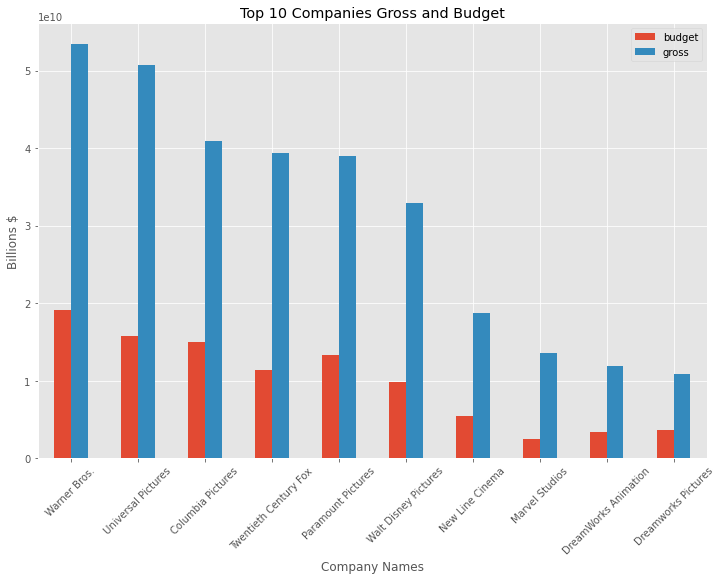

In [25]:
# Ploting the Top 10 Companies by Gross and Budget

ax = top10c.plot.bar(x ='company', rot = 0 )

# Lables and Title

plt.title("Top 10 Companies Gross and Budget")
plt.xlabel("Company Names")
plt.ylabel("Billions $")

# Defining the x-axis values to make it clear

plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9] , rotation = '45')

- Top 10 Companies with the most movie releases

In [26]:
# Making a new dataframe for the top 10 companies with the most movie releases

company = df3['company'].value_counts()
company = pd.DataFrame(company) 
company = company.head(10) 
company

,company
Universal Pictures,328
Columbia Pictures,295
Warner Bros.,294
Paramount Pictures,274
Twentieth Century Fox,207
New Line Cinema,151
Touchstone Pictures,104
Walt Disney Pictures,104
Metro-Goldwyn-Mayer (MGM),96
TriStar Pictures,75


([<matplotlib.axis.XTick at 0x262a67d51c0>,
 [Text(0, 0, 'Universal Pictures'),
  Text(1, 0, 'Columbia Pictures'),
  Text(2, 0, 'Warner Bros.'),
  Text(3, 0, 'Paramount Pictures'),
  Text(4, 0, 'Twentieth Century Fox'),
  Text(5, 0, 'New Line Cinema'),
  Text(6, 0, 'Touchstone Pictures'),
  Text(7, 0, 'Walt Disney Pictures'),
  Text(8, 0, 'Metro-Goldwyn-Mayer (MGM)'),
  Text(9, 0, 'TriStar Pictures')])

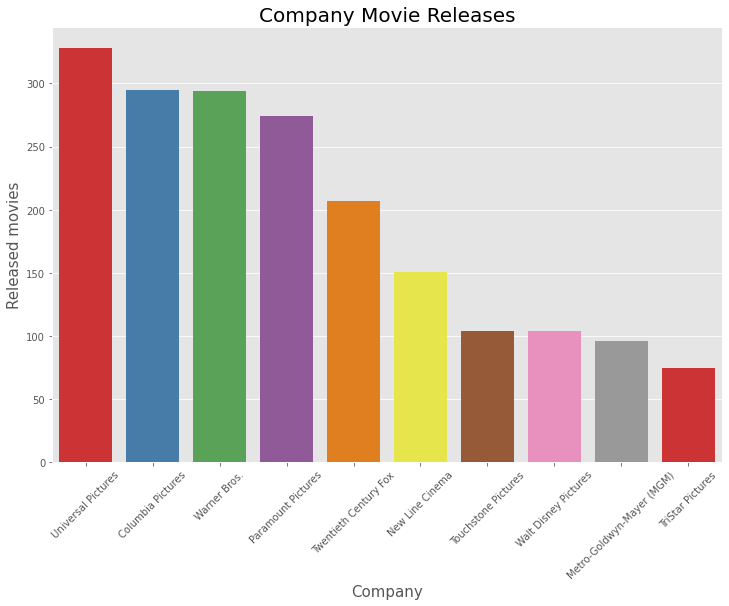

In [27]:
# Plotting the Companies with the most releases 

sns.barplot(x = company.index, y = company['company'] , palette="Set1")

plt.title('Company Movie Releases', fontsize = 20)
plt.xlabel('Company', fontsize = 15)
plt.ylabel('Released movies', fontsize = 15)

plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9] ,  rotation = '45')

In [28]:
# Warner has the highest gross although it released less movies than Columbia Pictures and Universal Pictures
#because it has more successful movies than them

- Genre Comparison

Text(0.5, 1.0, 'Genre percentages')

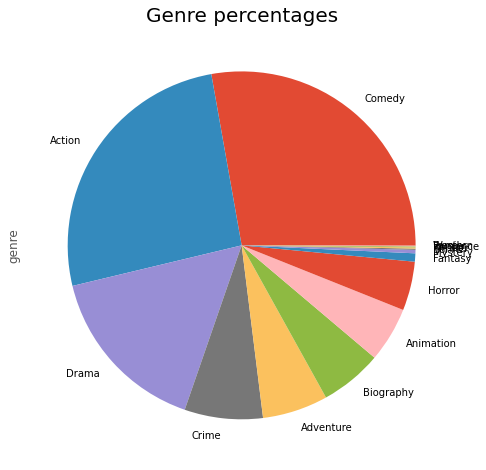

In [29]:
# Plotting the Genre comparison

df3['genre'].value_counts().plot.pie(figsize = (12,8))

plt.title('Genre percentages', fontsize = 20)

### conclusion

1.data is for years 1980 till 2020

2.highest counts for rating is R

3.most common genre is Comedy

4.Woody Allen has directed the most movies by directing 33 movies

5.Nicolas Cage is the most active actor by acting in 39 movies during this time

6.there is a high correlation between budget and gross that make sense the higher the budget the more it will sell 

7.Also we can say there is correlation between votes and gross

8.the gross and budget of each company is demonstrated

9.Warner has the highest gross although it released less movies than Columbia Pictures and Universal Picturesbecause it has more successful movies than them